In [0]:
import pandas as pd
import io
from scipy import stats
import numpy as np
import json
from google.colab import files
import matplotlib.pyplot as plt

In [0]:
# run separate code to make one big json file

In [4]:
uploaded = files.upload()

Saving tickers_test.json to tickers_test.json


In [0]:
# l = uploaded["tickers1533672887328.json"]
l = uploaded[next(iter(uploaded))]
j = json.loads(l)
s = [c["ticker"] for c in j["table"]] # get all tickers from JSON
f = list(set(s)) # a list of unique tickers in JSON
dfs = [] # empty data frame to hold all data frames

for ff in f: # ff is unique ticker
    # get all rows which correspond to that ticker
    r = [c for c in j["table"] if c["ticker"] == ff]
    # turn those rows into a dataframe
    df = pd.DataFrame(r)
    dfs.append(df)    


In [6]:
# calculate slope, variance, and secret number
ds = []
for d in dfs:
  j = d.sort_values('unixdate')
  if len(j) < 20:
        continue
  b = j['closeprice'].iloc[0] # intercept is first value
  qq = j['closeprice'].iloc[19] - j['closeprice'].iloc[0]

  myslope = qq/21
  i = 0
  diffall = 0 
    
  for p in j['closeprice']: 

    calcy = myslope * i + b # what y should have been (along line)
    i += 1 # iterates 1 to 20
    diff = abs(calcy - p) # difference between should have been y and reality
    diffall = diffall + diff # accumulated differences between shb y and reality
    
  if myslope > .15:
    t = d['ticker'].iloc[0]
    u = str(myslope)
    v = str(diffall)
    p = str(d['closeprice'].iloc[0])
    secretnum = str(diffall*d['closeprice'].iloc[0]/100)
    if float(secretnum) < 20: 
        print(t + ", " + u + ", " + v + ", " + p  + ", " + secretnum)
#         plt.plot(j['tickdate'], j['closeprice'])
#         plt.show()
        ds.append(d) # make an array for use later

TRTN, 0.2390476190476192, 41.69523809523812, 35.93, 14.981099047619054
SNE, 0.1595238095238096, 11.037619047619046, 54.65, 6.032058809523809
TSM, 0.18380952380952378, 16.49095238095238, 41.03, 6.766237761904762
UVE, 0.4214285714285715, 31.171428571428592, 45.25, 14.105071428571438
SWIR, 0.15238095238095234, 20.240476190476198, 19.4, 3.926652380952382
MDT, 0.15952380952380993, 7.313809523809553, 90.6, 6.626311428571455
ST, 0.19047619047619047, 18.243333333333304, 54.6, 9.960859999999984
NANO, 0.2576190476190478, 39.05142857142861, 41.83, 16.335212571428585
RSG, 0.1742857142857148, 19.37285714285713, 72.86, 14.115063714285704
PCRX, 0.5166666666666667, 28.758333333333375, 45.95, 13.214454166666687
MD, 0.15333333333333327, 36.976666666666624, 47.74, 17.652660666666648
SAVE, 0.22476190476190472, 26.749999999999957, 43.94, 11.753949999999982
STAA, 0.27619047619047604, 36.59285714285715, 39.95, 14.618846428571432
LUV, 0.19761904761904756, 29.876190476190473, 58.99, 17.62396476190476
TGT, 0.17

In [14]:
# print("{:.2f}".format(myslope))
# {:2f}.format(myslope)


SyntaxError: ignored

In [15]:
### 5 day study ###

d5s = []
for d in dfs:
  j = d.sort_values('unixdate')
  if len(j) < 20:
        continue

  b = j['closeprice'].iloc[0] # intercept is first value
  qq = j['closeprice'].iloc[19] - j['closeprice'].iloc[16]


  myslope = qq/5
  i = 0
  diffall = 0 
    
  for p in j['closeprice']: 
    calcy = myslope * i + b # what y should have been (along line)
    i += 1 # iterates 1 to 20
    diff = abs(calcy - p) # difference between should have been y and reality
    diffall = diffall + diff # accumulated differences between shb y and reality
    
  if myslope > .15:
    t = d['ticker'].iloc[0]
    u = str(myslope)
    v = str(diffall)
    p = str(d['closeprice'].iloc[0])
    secretnum = str(diffall*d['closeprice'].iloc[0]/100)
    if float(secretnum) < 20: 
        print(t + ", " + u + ", " + v + ", " + p  + ", " + secretnum)
    #     print(t + ", " + u + ", " + v )
    #     plt.scatter(j['tickdate'], j['closeprice'])
        px = j[15:21]
#         plt.plot(px['tickdate'], px['closeprice'])
#         plt.show()
        d5s.append(px)
    
  

UCTT, 0.26799999999999996, 121.19, 13.92, 16.869647999999998
MAIN, 0.19399999999999978, 32.449999999999925, 40.3, 13.077349999999969
PBFX, 0.25, 73.05000000000001, 22.25, 16.253625000000003
TRTN, 0.27800000000000014, 50.740000000000045, 35.93, 18.230882000000015
SNE, 0.18799999999999956, 13.789999999999921, 54.65, 7.536234999999957
SNN, 0.16599999999999965, 55.91799999999989, 35.2, 19.683135999999962
MDRX, 0.3219999999999999, 94.33999999999999, 13.7, 12.924579999999999
TTMI, 0.2800000000000004, 93.7000000000001, 18.6, 17.428200000000018
SM, 0.16399999999999934, 58.859999999999786, 28.36, 16.69269599999994
SC, 0.17600000000000052, 48.94000000000018, 20.51, 10.037594000000038
SLGN, 0.1759999999999998, 52.413999999999916, 27.11, 14.209435399999977
ORBC, 0.17199999999999988, 61.87999999999998, 10.93, 6.763483999999997
STAG, 0.15399999999999991, 47.49999999999997, 27.72, 13.166999999999991
UGP, 0.23000000000000007, 84.90000000000002, 10.67, 9.058830000000002
LPX, 0.15999999999999942, 67.459

In [0]:
h = pd.DataFrame({'x': range(1,21)})

for d in ds:
    startprice = d['closeprice'][19]  # startprice is float
    ticker = d['ticker'][19]
    d['new'] = ((d['closeprice'] - startprice) * 100) / startprice 
    h[ticker] = d['new']

# turn data around so it plots right
h = h.reindex(index=h.index[::-1])
h['x'] = range(1,21)

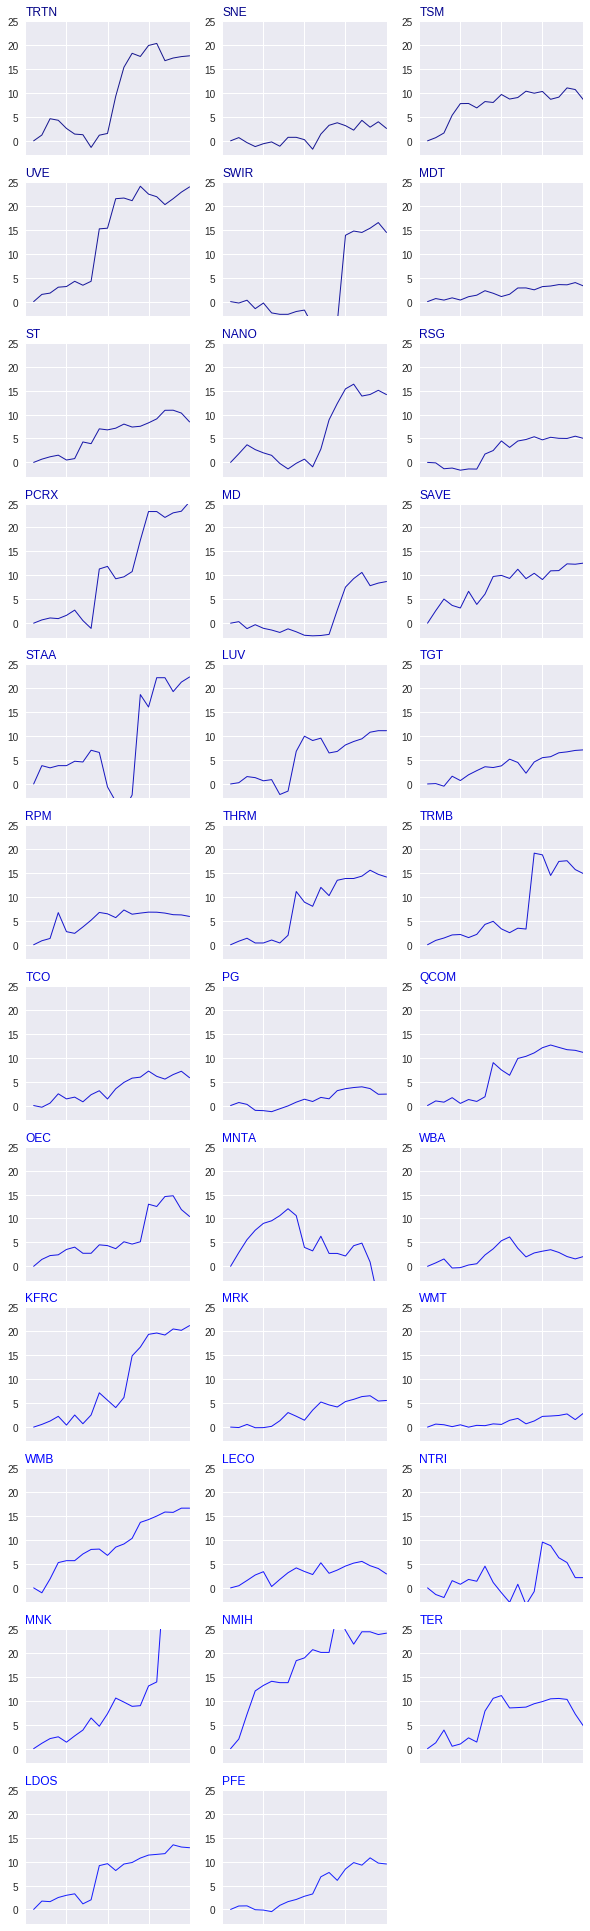

In [17]:
# to plot out 20 day tickers

lends = len(ds) # for calculating plot size
plt.rcParams["figure.figsize"] = (10,lends)
# Initialize the figure
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('jet')

# multiple line plot
num = 0
df = h
# h = df.sort_values(by=['x'], ascending=False)

splen = int(lends/3) + 1 # to calculate # of rows so we know how many plots

for column in h.drop('x', axis=1):
    num += 1

    # Find the right spot on the plot
    plt.subplot(splen, 3, num)
    
    # Plot the lineplot
    plt.plot(h['x'], h[column], marker='', color=palette(num),
             linewidth=1, alpha=0.9, label=column)

    # Same limits for everybody!
    plt.xlim(0,20)
    plt.ylim(-3,25)

    # Not ticks everywhere
    if num in range(100) :
        plt.tick_params(labelbottom='off')
#     if num not in [1,4,7] :
#         plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))
 


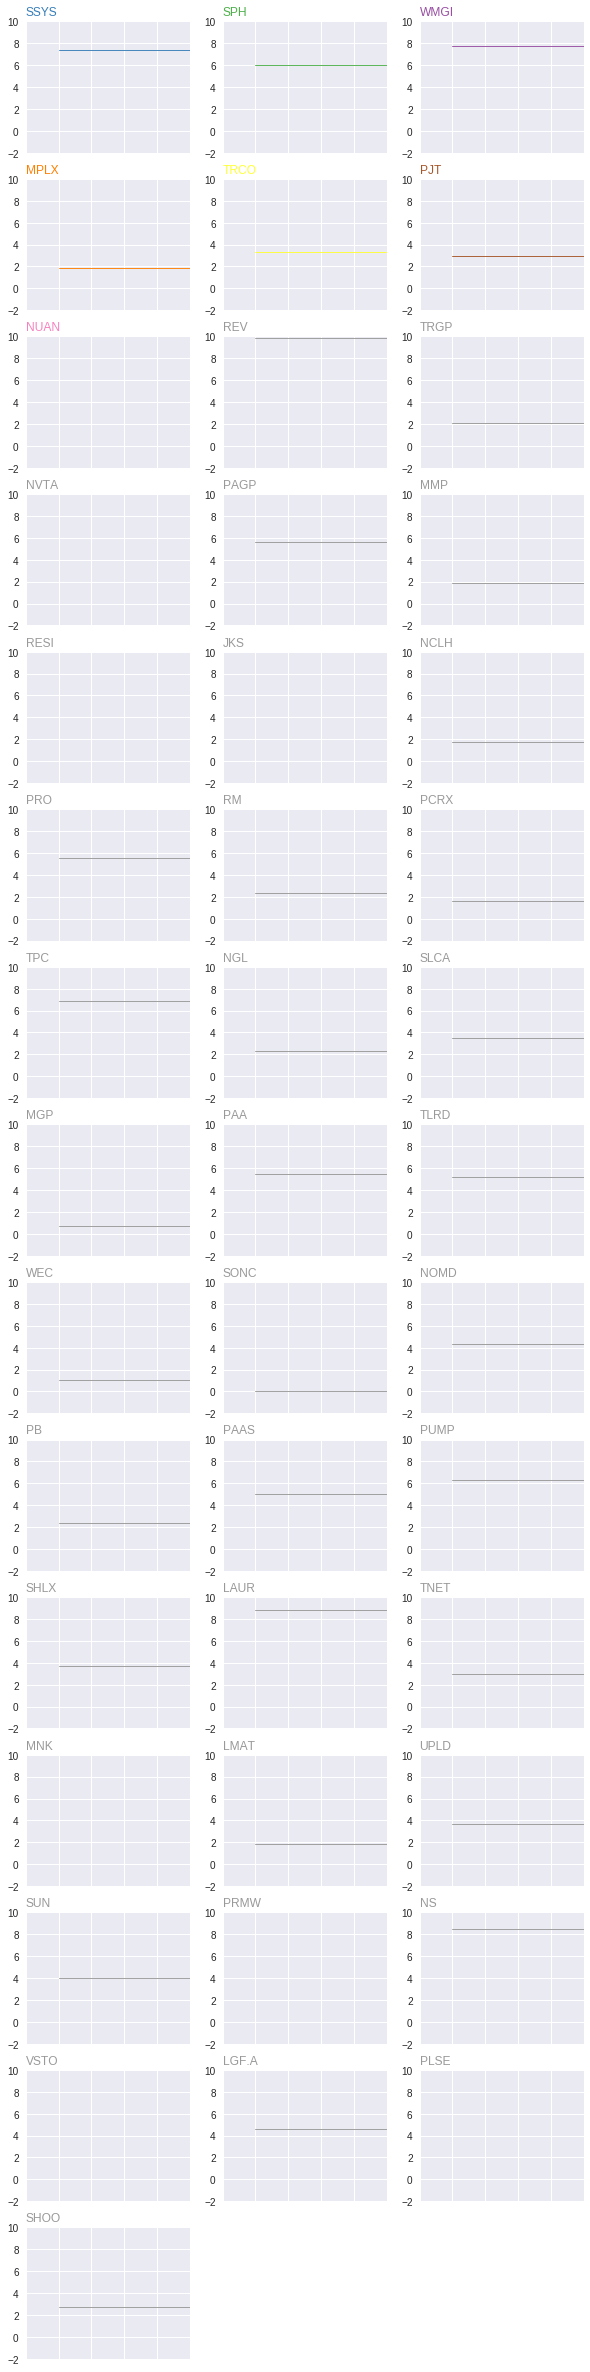

In [23]:
# to plot out 5 day tickers

kk = pd.DataFrame({'x': range(1,6)})

for d5 in d5s:
    startprice = d5['closeprice'][4]  # startprice is float
    ticker = d5['ticker'][4]
    d5['new'] = ((d5['closeprice'][0] - startprice) * 100) / startprice 
    kk[ticker] = d5['new']  # what does this line do?

lends = len(d5s)
plt.rcParams["figure.figsize"] = (10,lends)
# Initialize the figure
plt.style.use('seaborn-darkgrid')

# create a color palette
palette = plt.get_cmap('Set1')

# multiple line plot
num = 0
df = kk
# h = df.sort_values(by=['x'], ascending=False)

splen = int(lends/3) + 1

for column in kk.drop('x', axis=1):
    num += 1

    # Find the right spot on the plot
    plt.subplot(splen, 3, num)
    
    # Plot the lineplot
    plt.plot(kk['x'], kk[column], marker='', color=palette(num),
             linewidth=1, alpha=0.9, label=column)

    # Same limits for everybody!
    plt.xlim(0,5)
    plt.ylim(-2,10)

    # Not ticks everywhere
    if num in range(100) :
        plt.tick_params(labelbottom='off')
#     if num not in [1,4,7] :
#         plt.tick_params(labelleft='off')
 
    # Add title
    plt.title(column, loc='left', fontsize=12, fontweight=0, color=palette(num))
 
# # general title
# plt.suptitle("Today's Stocks", fontsize=13, fontweight=0, color='black', style='italic', y=1.02)

In [22]:
splen

14

In [0]:
i =0 
j = 20
dfs = []

# get all possible values from df

t = df.ticker.tolist()
t = set(t) # gets unique tickers
t = list(t) # sets the unique set back to a list

for g in t:  # iterate through and make each a new df
  s = df.loc[df['ticker'] == g]
  dfs.append(s)

# print(dfs)
# while True:

#   g = df.shape[0]  # counts items in dataframe
#   # make an array of dataframes
#   newdf = df[i:j]
#   i = i + 21
#   j = j + 21
#   dfs.append(newdf)
  
#   if (j > g):
#     break
    

# print(len(dfs))

  

In [94]:
d

,closeprice,iter,tickdate,ticker,unixdate,volume,new
0,71.88,20,2018-08-10,JEC,1533859200,844004,9.824293
1,72.56,19,2018-08-09,JEC,1533772800,1415012,10.863254
2,72.88,18,2018-08-08,JEC,1533686400,1392088,11.352177
3,72.16,17,2018-08-07,JEC,1533600000,1428625,10.252101
4,72.31,16,2018-08-06,JEC,1533513600,4053128,10.481283
5,67.09,15,2018-08-03,JEC,1533254400,1011303,2.505730
6,66.92,14,2018-08-02,JEC,1533168000,623487,2.245989
7,67.05,13,2018-08-01,JEC,1533081600,559415,2.444614
8,67.63,12,2018-07-31,JEC,1532995200,689504,3.330787
9,66.98,11,2018-07-30,JEC,1532908800,889837,2.337662


In [43]:
for d in dfs:
  j = d.sort_values('unix')
#   print(j['ticker'][0:1])
#   y = j['close']
#   X = range(0,20)
#   slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
#   if slope > 0.19 and slope < 1:
#     print(d['ticker'][0:1])
#     print("var: " + str(r_value))
#     myslope = (j['close'].iloc[19] - j['close'].iloc[0]) / 20
#     print(myslope)
# #     print(j['close'][0])
#     print(" ")
  b = j['close'].iloc[0] # intercept is first value
  qq = j['close'].iloc[20] - j['close'].iloc[0]
  print(j['ticker'].iloc[0])
  print(j['close'].iloc[20])
  print(j['close'].iloc[0])
  print(qq)
  myslope = (j['close'].iloc[20] - j['close'].iloc[0])/20
  i = 0
  diffall = 0 
  for p in j['close']: 
    diffall = 0 
  #   print(b) # intercept
  #   print("actual y: " + str(p)) # this is known y
  #   print(i) # these are my x values

    calcy = myslope * i + b
    i += 1
  #   print("calculated: " + str(calcy)) # this is calculated y
    diff = calcy - p 
  #   print(str(diff) + " is the diff") # this is difference between ys
    diffall = diffall + diff
  #   print(" ")
  if myslope > .1:
    print(d['ticker'].iloc[0])
    print("slope is " + str(myslope))
    print("diff is " + str(diffall))
    



KeyError: ignored

In [0]:
j['close'].iloc[20] - j['close'].iloc[0]

-0.4299999999999997

In [0]:
j

,ticker,date,close,volume,unix,number
41,JPS,2018-06-05,9.39,425413,1528156800,0
40,JPS,2018-06-06,9.42,347796,1528243200,1
39,JPS,2018-06-07,9.50,394931,1528329600,2
38,JPS,2018-06-08,9.42,224968,1528416000,3
37,JPS,2018-06-11,9.46,344105,1528675200,4
36,JPS,2018-06-12,9.47,323576,1528761600,5
35,JPS,2018-06-13,9.45,251334,1528848000,6
34,JPS,2018-06-14,9.36,332240,1528934400,7
33,JPS,2018-06-15,9.37,339301,1529020800,8
32,JPS,2018-06-18,9.24,687827,1529280000,9


In [0]:

b = j['close'].iloc[0] # intercept is first value
myslope = (j['close'].iloc[18] - j['close'].iloc[0])/20

i = 0
diffall = 0 
for p in j['close']: 
#   print(b) # intercept
#   print("actual y: " + str(p)) # this is known y
#   print(i) # these are my x values

  calcy = myslope * i + b

  i += 1
#   print("calculated: " + str(calcy)) # this is calculated y
  diff = calcy - p 
#   print(str(diff) + " is the diff") # this is difference between ys
  diffall = diffall + diff
#   print(" ")
  
print(diffall)
  
 



112.12
actual y: 112.12
0
calculated: 112.12
0.0 is the diff
 
112.12
actual y: 113.06
1
calculated: 111.241
-1.8190000000000026 is the diff
 
112.12
actual y: 110.75
2
calculated: 110.36200000000001
-0.387999999999991 is the diff
 
112.12
actual y: 105.85
3
calculated: 109.483
3.6330000000000098 is the diff
 
112.12
actual y: 110.21
4
calculated: 108.604
-1.6059999999999945 is the diff
 
112.12
actual y: 108.2
5
calculated: 107.72500000000001
-0.4749999999999943 is the diff
 
112.12
actual y: 109.33
6
calculated: 106.846
-2.4839999999999947 is the diff
 
112.12
actual y: 109.48
7
calculated: 105.967
-3.5130000000000052 is the diff
 
112.12
actual y: 105.79
8
calculated: 105.08800000000001
-0.7019999999999982 is the diff
 
112.12
actual y: 107.1
9
calculated: 104.209
-2.890999999999991 is the diff
 
112.12
actual y: 107.0
10
calculated: 103.33000000000001
-3.6699999999999875 is the diff
 
112.12
actual y: 103.92
11
calculated: 102.45100000000001
-1.468999999999994 is the diff
 
112.12


In [0]:
(j['close'].iloc[18] - j['close'].iloc[0])/20

-0.8789999999999999

-4.3635


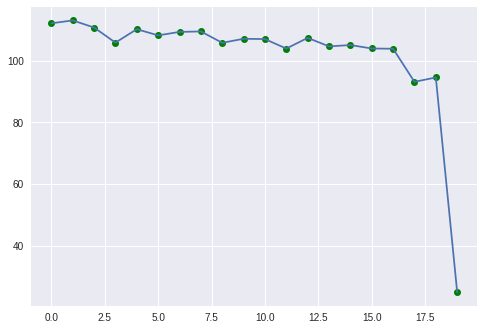

In [0]:
import numpy as np
import matplotlib.pyplot as plt


j = d.sort_values('unix')
y = j['close']
X = range(0,20)
X = np.array(X)
y = np.array(y)
x = X

x1 = 0
x2 = 20
y1 = j['close'].iloc[0]
y2 = j['close'].iloc[19]
m = (y2 - y1) / (x2 - x1)

print(m)

plt.plot(x, y, 'go')
plt.plot(y)
# plt.plot(x, a*x, 'r-')
plt.show()
# 
# slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
# if slope > 0.19 and slope < 1:
#   print(d['ticker'][0:1])
#   print("m: " + str(slope))
# #     print(intercept)
#   print("var: " + str(r_value))
#   print(" ")



In [0]:
j['close'][0]

KeyError: ignored

In [0]:
d[0:5]

,ticker,date,close,volume,unix,number
0,KANG,7/2/2018,20.50,261378,1530489600,20
1,KANG,6/29/2018,20.46,350703,1530230400,19
2,KANG,6/28/2018,20.45,774243,1530144000,18
3,KANG,6/27/2018,20.46,1041501,1530057600,17
4,KANG,6/26/2018,20.35,1589085,1529971200,16


In [0]:
# now 5
for d in dfs:
  d = d[0:5]
  j = d.sort_values('unix')
  y = j['close']
  X = range(0,5)
  slope, intercept, r_value, p_value, std_err = stats.linregress(X,y)
  if slope > 0.19 and slope < 1:
    print(d['ticker'][0:1])
    print("m: " + str(slope))
#     print(intercept)
    print("var: " + str(r_value))
    print(" ")

42    JLL
Name: ticker, dtype: object
m: 0.749000000000001
var: 0.6741589510361307
 
105    KEX
Name: ticker, dtype: object
m: 0.35499999999999976
var: 0.9410786114434718
 
126    MSFT
Name: ticker, dtype: object
m: 0.2930000000000007
var: 0.5186271256616215
 
336    JKHY
Name: ticker, dtype: object
m: 0.32899999999999924
var: 0.5969123859386901
 
399    JNPR
Name: ticker, dtype: object
m: 0.30400000000000027
var: 0.9865762877863835
 
756    LEN
Name: ticker, dtype: object
m: 0.23600000000000065
var: 0.7677405550286855
 
798    KSU
Name: ticker, dtype: object
m: 0.37000000000000033
var: 0.6902552621494119
 
1050    AAPL
Name: ticker, dtype: object
m: 0.6450000000000018
var: 0.8570250019609381
 
1071    KMB
Name: ticker, dtype: object
m: 0.5240000000000009
var: 0.9049182133281747
 
1176    K
Name: ticker, dtype: object
m: 0.2509999999999991
var: 0.8479923302138619
 
1428    LITE
Name: ticker, dtype: object
m: 0.554999999999999
var: 0.7784539528821341
 
1701    KBH
Name: ticker, dtype: o

In [0]:
import statsmodels.api as sm
xx = j['number']
y = j['close']
X = range(1,21)
# X = sm.add_constant(X)
# xx = sm.add_constant(xx) # constant - needed?

model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# # Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  close   R-squared:                       0.777
Model:                            OLS   Adj. R-squared:                  0.765
Method:                 Least Squares   F-statistic:                     66.19
Date:                Tue, 03 Jul 2018   Prob (F-statistic):           1.30e-07
Time:                        01:17:45   Log-Likelihood:                -103.00
No. Observations:                  20   AIC:                             208.0
Df Residuals:                      19   BIC:                             209.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             6.5007      0.799      8.136      0.000       4.828       8.173
==============================================================================
Omnibus:                        3.501   Durbin-Watson:                   0.025
Prob(Omnibus):                  0.174   Jarque-Bera (JB):                1.578
Skew:                          -0.326   Prob(JB):                        0.454
Kurtosis:                       1.788   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

0.21398496240601514
86.13214285714285
0.21885726581894377


AttributeError: ignored

In [0]:
from sklearn import linear_model
X = j['number']
y = j['close']
y = y.reshape(1, -1)
lm = linear_model.LinearRegression()
model = lm.fit(X,y)
predictions = lm.predict(X)
print(predictions)[0:5]

AttributeError: ignored

In [0]:
import time
import datetime
# also need to sort by date

# f['unixtime'] = time.mktime(datetime.datetime.strptime(str(f['date']), "%d/%m/%Y").timetuple())
index = pd.DatetimeIndex(f['date'])
index.astype(np.int64)
f['date'].index.astype(np.int64)





Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
            19],
           dtype='int64')

In [0]:
type(f['datetime'])


pandas.core.series.Series

In [0]:
p = []
for l in f.values:
  p.append(l[1])
print(p)

['6/29/2018', '6/28/2018', '6/27/2018', '6/26/2018', '6/25/2018', '6/22/2018', '6/21/2018', '6/20/2018', '6/19/2018', '6/18/2018', '6/15/2018', '6/14/2018', '6/13/2018', '6/12/2018', '6/11/2018', '6/8/2018', '6/7/2018', '6/6/2018', '6/5/2018', '6/4/2018']


In [0]:
from operator import itemgetter
sorted(p, key=itemgetter(2))
# sorted(p, key=lambda date: date[1])

['6/19/2018',
 '6/18/2018',
 '6/15/2018',
 '6/14/2018',
 '6/13/2018',
 '6/12/2018',
 '6/11/2018',
 '6/29/2018',
 '6/28/2018',
 '6/27/2018',
 '6/26/2018',
 '6/25/2018',
 '6/22/2018',
 '6/21/2018',
 '6/20/2018',
 '6/4/2018',
 '6/5/2018',
 '6/6/2018',
 '6/7/2018',
 '6/8/2018']

In [0]:
from scipy import stats
x = f['close']
y = f['datetime']
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

TypeError: ignored

In [0]:
for d in dfs:
#   print type(d) # data frames
#   print(d[0:1])
#   run statistical analysis on each d
    print(d['Ticker'][0:1])
#     print(d.describe())
#     print(d[0:1])



0    MNST
Name: Ticker, dtype: object
21    MTN
Name: Ticker, dtype: object
42    NLY
Name: Ticker, dtype: object
63    MRK
Name: Ticker, dtype: object
84    LEA
Name: Ticker, dtype: object
105    MUR
Name: Ticker, dtype: object
126    NLSN
Name: Ticker, dtype: object
147    MUSA
Name: Ticker, dtype: object
168    MMI
Name: Ticker, dtype: object
189    MS
Name: Ticker, dtype: object
210    MAN
Name: Ticker, dtype: object
231    MNRO
Name: Ticker, dtype: object
252    NUS
Name: Ticker, dtype: object
273    MWA
Name: Ticker, dtype: object
294    LLY
Name: Ticker, dtype: object
315    NOC
Name: Ticker, dtype: object
336    MCO
Name: Ticker, dtype: object
357    NLS
Name: Ticker, dtype: object
378    MGPI
Name: Ticker, dtype: object
399    LUV
Name: Ticker, dtype: object
420    NMZ
Name: Ticker, dtype: object
441    NUVA
Name: Ticker, dtype: object
462    MD
Name: Ticker, dtype: object
483    NDAQ
Name: Ticker, dtype: object
504    MCK
Name: Ticker, dtype: object
525    MLHR
Name: Ticker, 

In [0]:
df[20:41]

,Ticker,date,close,volume
20,MNST,6/1/2018,51.5,2915588.0
21,MTN,6/29/2018,274.19,248899.0
22,MTN,6/28/2018,271.68,335875.0
23,MTN,6/27/2018,270.65,280895.0
24,MTN,6/26/2018,276.87,309096.0
25,MTN,6/25/2018,276.17,279272.0
26,MTN,6/22/2018,280.81,457893.0
27,MTN,6/21/2018,278.83,334206.0
28,MTN,6/20/2018,279.95,414047.0
29,MTN,6/19/2018,280.82,419927.0
